In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import datasets
import math
import sys
sys.path.append('demo_python_backend_files')
%matplotlib inline

# Machine Learning Pipeline

>The content of this notebook is supplementary material for the textbook Machine Learning Refined (Cambridge University Press, 2016). Visit http://www.mlrefined.com for free chapter downloads and tutorials, and [our Amazon site here](https://www.amazon.com/Machine-Learning-Refined-Foundations-Applications/dp/1107123526/ref=sr_1_1?ie=UTF8&qid=1474491657&sr=8-1&keywords=machine+learning+refined) for details regarding a hard copy of the text.


In Section 1.1 of the text we described a prototypical machine learning pipeline for the toy problem of distinguishing between images of cats versus dogs. In this notebook we follow this pipeline, this time to solve a real classification problem - that of handwritten digit recognition - in order to solidify your understanding of the ML pipeline and the steps involved. For convenience we reproduce below the graphical representation of our ML pipeline from chapter 1 (this is Figure 1.6 in the book).
<img src="demo_images/pipeline.png" width=750 height=350/>

### Let's now follow the pipeline one step at a time!

<img src="demo_images/0.png" width=500 height=300/>

Handwritten digit classifiers are built into the software of mobile banking applications, as well as more traditional ATMs, to give users the ability to e.g., automatically deposit paper checks. In this application each class of data consists of (images of) several handwritten version of a single digit in the range 0-9. For simplicity, we focus here on developing a pipeline for distinguishing between two digits only: **0 versus 1**. Extending a two-class classification problem to a general multi-class setting is discussed in Section 4.4 of [our textbook](http://mlrefined.wix.com/home-page#!download-sample-chapters/cjg9).  

<img src="demo_images/1.png" width=500 height=300 />

The dataset we use here is the [load_digit dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#examples-using-sklearn-datasets-load-digits) consisting of 178 handwritten 0's and 182 handwritten 1's. The first 10 instances of each class are shown below. 

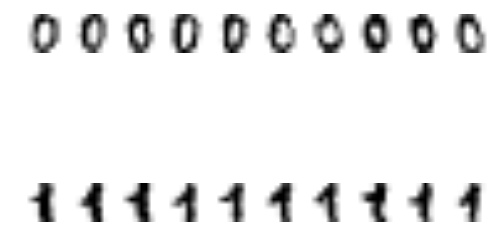

In [2]:
# loading data
x = datasets.load_digits().images # x: input image
y = datasets.load_digits().target # y: label
 
n = 10 # plotting the first 10 instances of each class   
for i in np.arange(0,2*n):  
    plt.subplot(2, n, i+1)
    plt.imshow(x[y==int(i>=n)][np.mod(i,n)], cmap=plt.cm.gray_r)
    plt.axis('off')
plt.show()

Let us now split the data and keep the first half for training and the second half for testing.

In [3]:
num_0s = len(x[y==0]) # number of 0's in the dataset. Here num_0s = 178
num_1s = len(x[y==1]) # number of 1's in the dataset. Here num_1s = 182 

# training set
x_train = np.concatenate((x[y==0][0:num_0s/2], x[y==1][0:num_1s/2]))  
y_train = np.concatenate((y[y==0][0:num_0s/2], y[y==1][0:num_1s/2])) 

# testing set
x_test = np.concatenate((x[y==0][num_0s/2:num_0s], x[y==1][num_1s/2:num_1s])) 
y_test = np.concatenate((y[y==0][num_0s/2:num_0s], y[y==1][num_1s/2:num_1s])) 

Both our training and testing sets will now have 180 data points, which is large enough for the purposes of this notebook. But remember: **The larger and more diverse the data the better.** See [here](http://yann.lecun.com/exdb/mnist/) if you would like to try a larger dataset.

<img src="demo_images/2.png" width=500 height=300 />

OK, we are now at the most crucial step in the pipeline - **designing features.** Each data point in our case is an 8x8 grey-scale image, that is, an 8x8 array whose entries are integer values in the range [0-16], with 0 and 16 being the brightest and darkest shades of grey respectively.

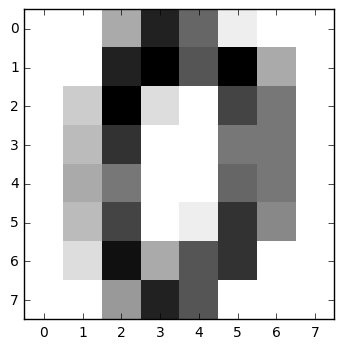

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [4]:
plt.imshow(x[y==0][0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
x[y==0][0]

What makes an image of a '0' different from that of a '1'? Although there's no definitive answer to this question, visual examination of the data can help us design well-performing features. For instance in the figure below, it seems like that pixels within the 2x2 center block of a '0' image (enclosed by a green box) are typically much brighter than pixels within the same block in a '1' image. By the same token, it is not unreasonable to assume that for a '0' image the 3x3 orange box in the bottom left corner will generally contain darker pixels. 

<img src="demo_images/features.png" width=500 height=300 />

The two observations made above can be translated into two features:

**Feature #1:** sum of pixel values in the <span style="color:green">green</span> box.                  
**Feature #2:** sum of pixel values in the <span style="color:orange">orange</span> box.

With the two features defined above let us now take a look at our training data in the feature space. 

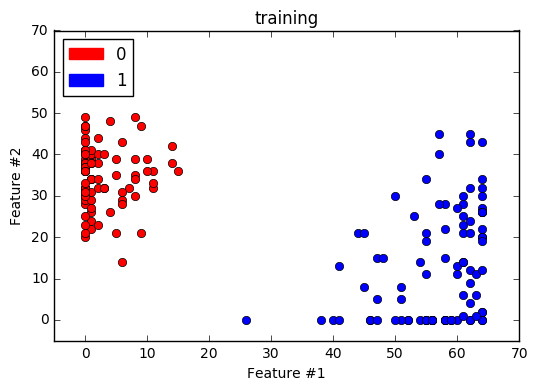

In [5]:
import feature_space

f1 = [3, 5, 3, 5] # green box's vertical and horizontal bounds
f2 = [5, 8, 0, 3] # orange box's vertical and horizontal bounds

feature_space.plotting(x_train, y_train, f1, f2, title='training')
plt.axis([-5, 70, -5, 70])
plt.show()

<img src="demo_images/3.png" width=500 height=300 />


Training a classifier in order to separate the feature represenations of each class typically requires quite a bit of algebra, calculus, and numerical optimization. In this particular case however - thanks to the well-designed features that give us excellent separation between the two classes, as well as the low dimensionality of the feature space which allows us to visually examine the feature space - one can comfortably propose the simple linear model

$$f_1 = f_2$$

as the classifier, where $f_1$ and $f_2$ respectively represent the values for Feature #1 and Feature #2.    

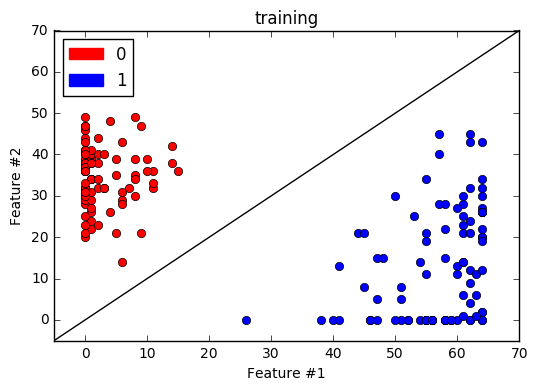

In [6]:
feature_space.plotting(x_train, y_train, f1, f2, title='training')

# plotting the classifier
t = np.arange(-5,70,.1)
plt.plot(t, t, 'k') 
plt.axis([-5, 70, -5, 70])
plt.show()

In chapter 4 of [Machine Learning Refined](http://mlrefined.wix.com/home-page#!download-sample-chapters/cjg9), we describe several ways of finding the equation of this line - not by inspection but in a mathematically rigorous way.

<img src="demo_images/4.png" width=500 height=300 />

To evaluate the performance of our classifier and see how it performs on unseen data, we must count the number of misclassified points in the **testing set**.    

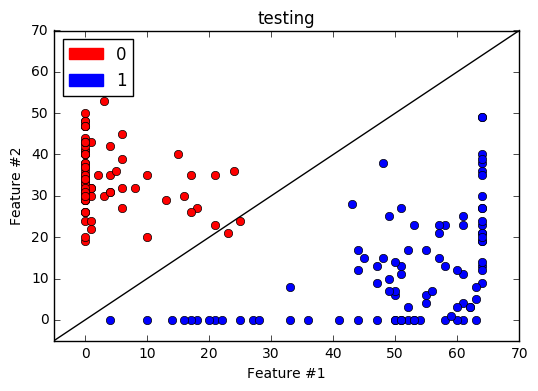

In [7]:
# plotting the classifier
t = np.arange(-5,70,.1)
plt.plot(t, t, 'k') 

# plotting the test set
feature_space.plotting(x_test, y_test, f1, f2, title='testing')
plt.axis([-5, 70, -5, 70])
plt.show()

As can be seen in the figure above our classifier has made only 2 errors, giving an overall accuracy score of 

$$accuracy = 1- \frac{2}{180}$$

or equivalently **98.9%**. We can finally take a look at the misclassified data points in our testing set. These are the *Boston Terriers* of our cat vs. dog example!  

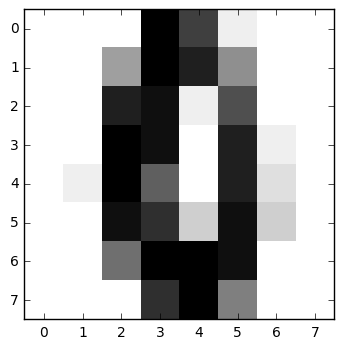

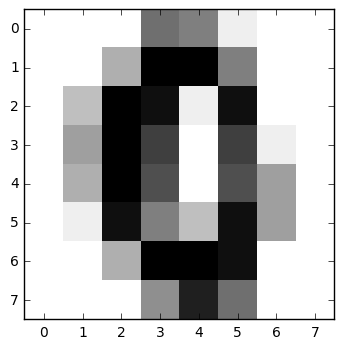

In [8]:
# plotting the misclassified points in the testing set
for ind, p in enumerate(x_test):
    feature_1 = p[f1[0]:f1[1], f1[2]:f1[3]].sum()
    feature_2 = p[f2[0]:f2[1], f2[2]:f2[3]].sum()
    
    if np.sign(y_test[ind]-.5)*(feature_1 - feature_2) < 0: 
        plt.imshow(p, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.show()       

# Final remarks

## 1. Feature design can "make or break" the entire pipeline. 

<img src="demo_images/bad_features.png" width=500 height=300 />

In generating features for the task at hand we relied on our intuition as well as our ability to visualize image data, and placed the proposed green and orange boxes in the center and bottom left corner of the input image, respectively. But what happens if we change the location of these boxes as shown in the figure above? Can we still make reliable predictions?        

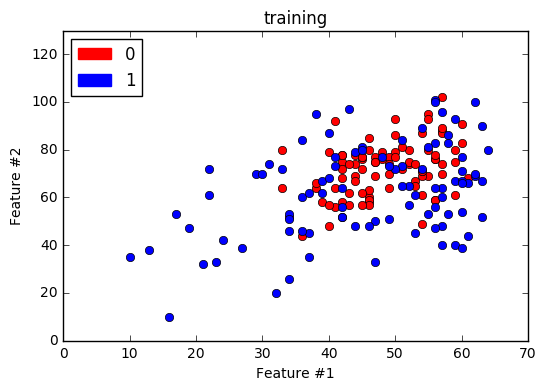

In [9]:
f1_new = [6, 8, 3, 5] # green box's vertical and horizontal bounds
f2_new = [1, 4, 1, 4] # orange box's vertical and horizontal bounds

feature_space.plotting(x_train, y_train, f1_new, f2_new, title='training')
plt.axis([0, 70, 0, 130])
plt.show()

The answer, as you can see from the figure above, is no! With these newly defined features, the feature representations of the two classess are so jammed together that no *reasonable* classifer can ever seperate them. **In effect, with this poor choice of features we just broke our pipeline!** This seems pretty disheartening, particularly for machine learning problems with more complex data that we cannot visualize or have no intuition about. The good news is, there are ways to automatically design features directly from data, discussed in chapters 5, 6, and 7 of [Machine Learning Refined](http://mlrefined.wix.com/home-page#!download-sample-chapters/cjg9).          

## 2. With small datasets, the choice of training and testing sets can affect the results!   

Recall from the "collect data" stage of the pipeline that we decided to keep the first half of the data for training, and leave the second half out for testing. Now let's see what happens if we do the reverse, i.e., use the second half (i.e., the old testing set)for training and the first half (i.e., the old training set) for testing. 

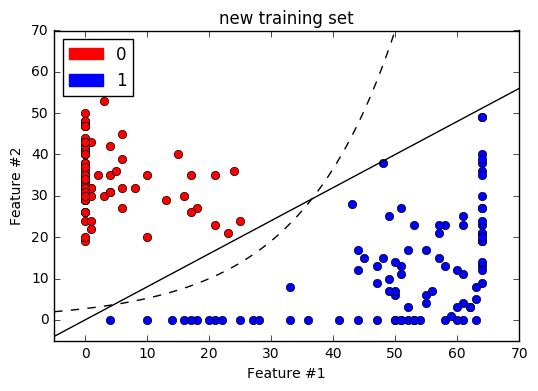

In [10]:
# plotting the new training set (the old test set)
feature_space.plotting(x_test, y_test, f1, f2, title='new training set')
plt.axis([-5, 70, -5, 70])

# plotting new classifiers
t = np.arange(-5,70,.1)
plt.plot(t, .8*t, 'k')    # linear classifier
plt.plot(t,np.exp(.065*t+1),'k--')  # exponential classifier
plt.show()

Notice that as was the case with our old training set, our current training set is also seperable by a line. However this time several data points lie very closely to our linear classifier and hence we may want to use a more complex model (like an exponential) that seperates the two classes more reliably. Hence the choice of training and testing sets could directly affect our modeling and ultimately the overall results, especially for small datasets. Luckily there's a simple work-around for this problem, referred to as **cross-validation**, which we discuss in great detail in chapters 5 and 6 of [Machine Learning Refined](http://mlrefined.wix.com/home-page#!download-sample-chapters/cjg9).  